<a href="https://colab.research.google.com/github/alfinmaulani/skripsi/blob/master/3.1ekstraksi_dan_klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade scikit-learn
import numpy as np
import pandas as pd
import io
import os
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import gensim
import ast

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

load korpus

In [2]:
korpus1a = '/content/drive/MyDrive/korpus1dataisear(preputama).csv'
korpus1b = '/content/drive/MyDrive/korpus1dataisear(preptambah).csv'
korpus2a = '/content/drive/MyDrive/korpus2(preputama).csv'
korpus2b = '/content/drive/MyDrive/korpus2(preptambah).csv'
df = pd.read_csv(korpus2b)

In [ ]:
# df=df.drop(df[df['emosi'] == 'shame'].sample(frac=1).index)
# df=df.drop(df[df['emosi'] == 'guilt'].sample(frac=1).index)
# df=df.drop(df[df['emosi'] == 'disgust'].sample(frac=1).index)

In [3]:
temp=[]
for senten in df.content:
  temp.append(ast.literal_eval(senten))
df.content=temp

pilih model

In [4]:
pakai_model=2

load model

In [5]:
from gensim.models import word2vec
!pip install glove-python-binary
from glove import Glove
from glove import Corpus

     |████████████████████████████████| 948 kB 25.2 MB/s 


In [6]:
if pakai_model == 1:#load model word2vec
  model = gensim.models.word2vec.Word2Vec.load('/content/drive/MyDrive/korpus2+blog(preptambah).w2v')

elif pakai_model == 2:#load model glove
  model=Glove.load('/content/drive/MyDrive/korpus2+blog(preptambah).glove')

cek model

In [7]:
if pakai_model == 1:
  print(model.wv.vectors.shape)
elif pakai_model == 2:
  print(model.word_vectors.shape)

(909479, 100)


In [8]:
if pakai_model == 1:
  print(model.wv["yes"])
elif pakai_model == 2:
  print(model.word_vectors[model.dictionary['yes']])

[-2.82227862e-01 -9.93760340e-02 -1.04850553e-01 -3.08547528e-02
  4.31177631e-02  2.61965730e-02  4.38989563e-01 -1.74258680e-01
  3.84116058e-01 -2.12612538e-01 -1.86424062e-01 -2.55049147e-01
  2.44699459e-01  6.31840312e-01 -3.72159326e-01  1.73144801e-02
  1.56414569e-01 -5.23148252e-01 -4.17538878e-01  5.04786464e-01
  1.52033974e-01 -5.33830670e-02 -9.62067298e-02 -1.03583431e-01
  4.72128608e-01  5.14354400e-02 -2.10955207e-01  1.30368907e-01
  1.55843518e-01  2.32764707e-01  3.48478150e-01  4.99723577e-02
 -1.71293213e-01 -1.48894154e-01  5.14757034e-01  3.33235230e-01
 -7.39486066e-03 -8.80872704e-02 -7.13559355e-02 -5.75969545e-02
 -6.05742374e-02  7.07580593e-02  5.33689287e-01  3.28259941e-02
 -1.33465973e+00 -7.43962031e-01 -5.61848027e-02 -7.24593521e-02
  1.43055352e-01  4.19189096e-01 -2.19449216e-01 -1.22251511e-01
 -7.62292716e-01  1.97460497e-03  3.33678047e-01  1.18453830e-01
 -2.74877198e-01  2.70904650e-02 -2.56731958e-01  3.28700418e-01
 -1.44555705e-01 -1.47594

ambil conntoh model wor embedding

In [ ]:
import array
count=0
simpanang=[]
simpankat=[]
jml=24
if pakai_model == 1:
  for senten in df.dokumen:
    for word in senten:
      simpanang.append(model.wv[word])
      simpankat.append(word)
      if count<jml:
        count+=1
      else :
        break
    if count<jml:
      count+=1
    else :
      break

elif pakai_model == 2:
  for senten in df.dokumen:
    for word in senten:
      simpanang.append(model.word_vectors[model.dictionary[word]])
      simpankat.append(word)
      if count<jml:
        count+=1
      else :
        break
    if count<jml:
      count+=1
    else :
      break


In [ ]:
dfang=pd.DataFrame(simpanang)
dfkat=pd.DataFrame(simpankat)
result = pd.concat([dfkat, dfang], axis=1)
result.shape

(24, 101)

In [ ]:
result.to_excel("preptambah,glove.xlsx")

sum base ekstraksi fitur

In [14]:
import array
ekstrak=[]
temp=array.array('i',(0,)*100)
hitungbiasa=0
hitungpre=0

if pakai_model == 1:
  for senten in df.content:
    for word in senten:
      temp=np.add(temp,model.wv[word])
    # temp=temp/len(senten)
    ekstrak.append(temp)

elif pakai_model == 2:
  for senten in df.content:
    for word in senten:
      temp=np.add(temp,model.word_vectors[model.dictionary[word]])
    # temp=temp/len(senten)
    ekstrak.append(temp)

has_vec=ekstrak

average base ekstraksi fitur

In [9]:
import array
ekstrak=[]
temp=array.array('i',(0,)*100)

if pakai_model == 1:
  for senten in df.content:
    for word in senten:
      temp=np.add(temp,model.wv[word])
    temp=temp/len(senten)
    ekstrak.append(temp)

elif pakai_model == 2:
  for senten in df.content:
    for word in senten:
      temp=np.add(temp,model.word_vectors[model.dictionary[word]])
    temp=temp/len(senten)
    ekstrak.append(temp)

has_vec=ekstrak

In [15]:
X=has_vec
y=df.sentiment
print(np.shape(X))
print(np.shape(y))
# print(X)
# print(y)

(9279, 100)
(9279,)


klasifikasi svm

In [11]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

In [12]:
def klasifikasi(y_pred):
  ConfusionMatrixDisplay.from_predictions(y, y_pred)
  plt.show()
  print(accuracy_score(y, y_pred))
  print(precision_recall_fscore_support(y, y_pred, average='macro'))

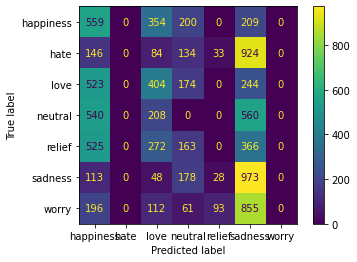

0.2086431727556849
(0.1032822172406261, 0.20704790366980713, 0.13234605187864962, None)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
clf = svm.SVC(kernel='poly', decision_function_shape='ovr', C=17.0)
# acc10k=cross_val_score(clf, X, y, cv=10)
# np.mean(acc10k)
y_pred = cross_val_predict(clf, X, y, cv=10)
klasifikasi(y_pred)

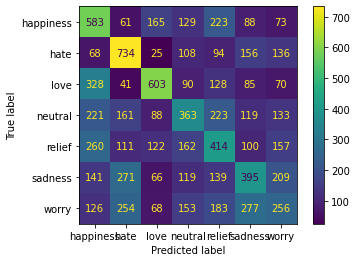

0.36081474296799226
(0.3580829056740232, 0.36055181581190343, 0.35620886810733376, None)


In [ ]:
clf = svm.SVC(kernel='rbf', decision_function_shape='ovr')
y_pred = cross_val_predict(clf, X, y, cv=10)
klasifikasi(y_pred)

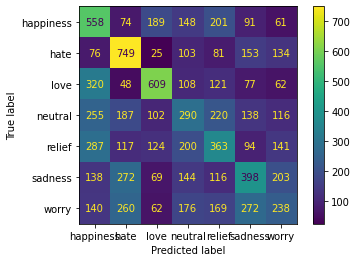

0.34540359952581096
(0.33967824084291826, 0.34500963056815764, 0.33876363950124333, None)


In [ ]:
clf = svm.SVC(kernel='linear', decision_function_shape='ovr')
y_pred = cross_val_predict(clf, X, y, cv=10)
klasifikasi(y_pred)